<a href="https://colab.research.google.com/github/TusharNautiyal-web/CollabNotebooks/blob/main/All%20Notebooks/Credit_Card_User_Clustering_End_To_End_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


  
# नमस्ते 🙏 Welcome To This Notebook

<input type = 'text' class = 'Feelings' value = 'Enter How are you Feeling' />

```
@author : Tushar Nautiyal
@For Tutorial : Go to Yotube Channel Tushar Nautiyal.
```
# Clustering on Credit Card Dataset
1. **What is the Purpose For This Collab Notebook?.**   ⏬

  To Better Understand how clustering using k-means work and how to apply an end to end project on an unsupervised model.

2. **What Things We Covered ?**  ⏬
  1. Understanding Dataset and Handling Missing Values. ✅
  2. Used Data Wrang to remove highly corr-related features  ✅ 
  3. Used Elbow method and used K-means to create clusters ✅
  4. Did Basic EDA on Clusters ✅
  5. Deplpyed a End To End Streamlit site using local Tunnel ✅

3. How it is Deployed ⏬

  Deployed using streamlit and local tunnel to view it from anywhere. Please Run all the code first as the model will get removed after each new collab instance. 
  
  **Step 1**: Just go to Runtime option
  
  **Step 2:** Just go to Run all
  
  *Alternately if you don't want to use **datawrang** or change something.*
  ***
  **Step 1**: Run Each Part by pressing Shift-Enter
  
  **Step 2**: If want to edit something like in model or (select a different model from sklearn) just change the model at the below code.


4. Credits ⏬

  Dataset Name: Credit Card Dataset For Clustering

  Dataset Link: <a href = 'https://www.kaggle.com/datasets/arjunbhasin2013/ccdata'/>Kaggle</a>

  Connect With Me :
  <a href = 'https://www.linkedin.com/in/tusharnautiyal/'><img src = 'https://cdn-icons-png.flaticon.com/512/174/174857.png' width = '20px' height = '20px' ></img></a> 
<a href = 'https://github.com/TusharNautiyal-web'><img src = 'https://cdn-icons-png.flaticon.com/512/25/25231.png' width = '25px' height = '25px' ></img></a>
<a href = 'https://twitter.com/Tushar09235016'><img src = 'http://assets.stickpng.com/images/580b57fcd9996e24bc43c53e.png' width = '25px' height = '25px' ></img></a>
<a href = 'https://www.youtube.com/channel/UCsfYqXa3LoaLkB-9F2vmplA'><img src = 'https://www.freeiconspng.com/thumbs/youtube-logo-png/hd-youtube-logo-png-transparent-background-20.png' width = '25px' height = '25px'></img></a>
<a href = 'https://www.kaggle.com/tusharnautiyalweb'><img src = 'https://cdn4.iconfinder.com/data/icons/logos-and-brands/512/189_Kaggle_logo_logos-512.png' width = '20px' height = '20px' ></img> </a>
  

In [ ]:
# importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
# First of all we will be needing the dataset.
# So lets just import customer data from kaggle
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1euZe7HIAOvKw7XuqZUMR7OGGVNLKdt70")

In [ ]:
df.shape

(8950, 18)

In [ ]:
df.head() # Wallah its done lets go ahead and start working on Exploratory and data analysis

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

**After Checking Null values we can understand minum payments is having some amount of null values and credit limit i just 1 value.**

Now the question arise what we should use either mean lets see boxplot first.

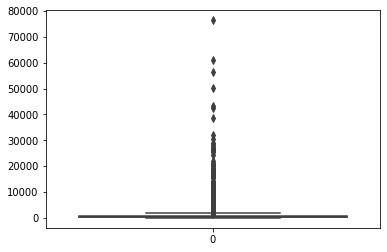

In [ ]:
sns.boxplot(data = df['MINIMUM_PAYMENTS'])

So there are many outliers in the minimum payments which means if we use mode or mean then values will be susceptible to outliers so it would be a better approach to go with median. Surely we can do more analysis before jumping to a conclusion like first of all if we get to know that the data is **MCAR** or **MNAR** but for this time i'll stick with it as the amount of null values is not that much infact its very low percentage. For now we are assuming that this is completly missing at random. 🙂

**Advantages**
1. Simple to implement(Robust to outliers)
2. The faster way to fill the missing values in the complete dataset 

**Disadvantages**
1. Change in the original variance
2. It impacts the Correlation


In [ ]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [ ]:
median = df['MINIMUM_PAYMENTS'].median() # you can do all this by my library for different features also.
df['MINIMUM_PAYMENTS'].fillna(median,inplace = True)

In [ ]:
df.drop('CUST_ID', inplace = True, axis = 1) # removing unecessary columns.

In [ ]:
df.dropna(inplace = True) # as we had one null value record

In [ ]:
df.shape

(8949, 17)

**Why Kde Not histogram ?**

Well It just looks way more smoother 😆 if you want i have done histogram below.

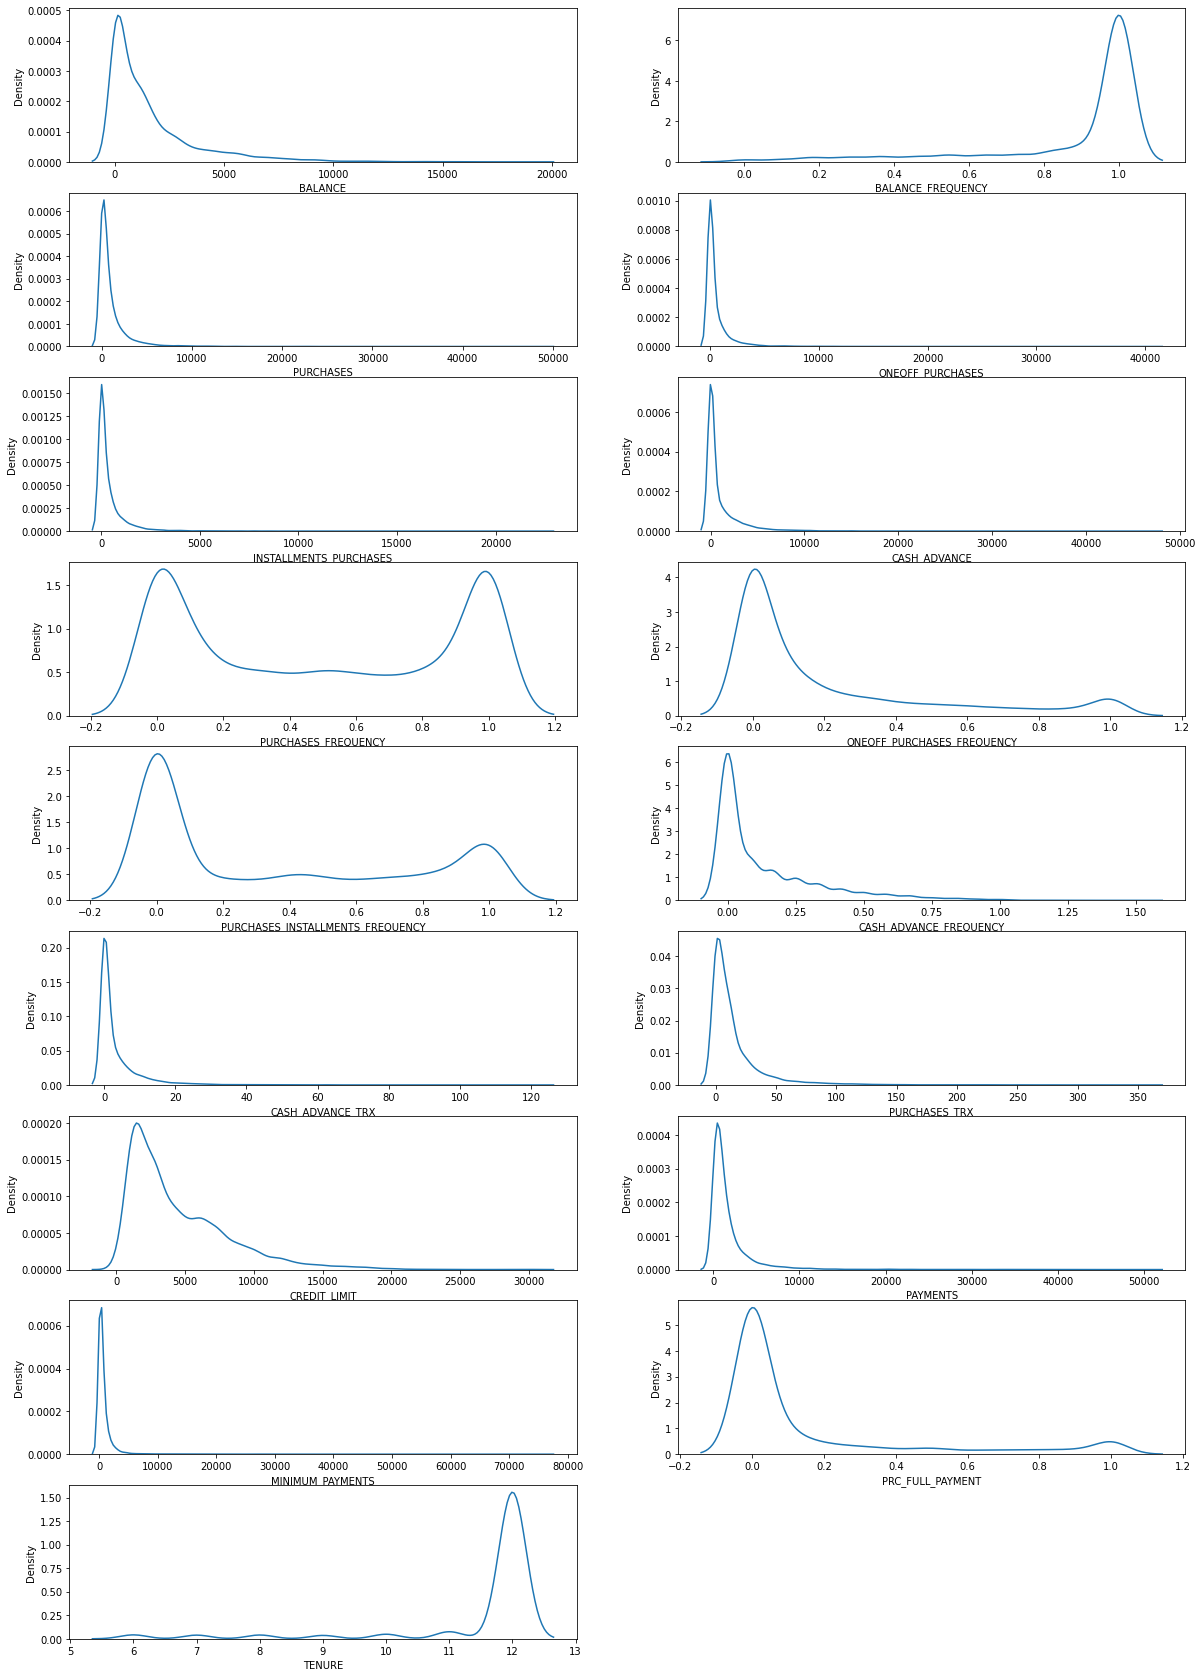

In [ ]:
plt.figure(figsize=(20,30))
for i, col in enumerate(df.columns):
      ax = plt.subplot(9, 2, i+1) # no of rows, no of columns and i+1 will tell the index.
      sns.kdeplot(df[col], ax=ax)
      plt.xlabel(col)
        
plt.show()

**Checking Correlation To find if any feature is highly correlated we should remove it .**

By checking below in our graph we can see that there are features which are highly co-related (above 80-90 percent) and hence we should remove them.

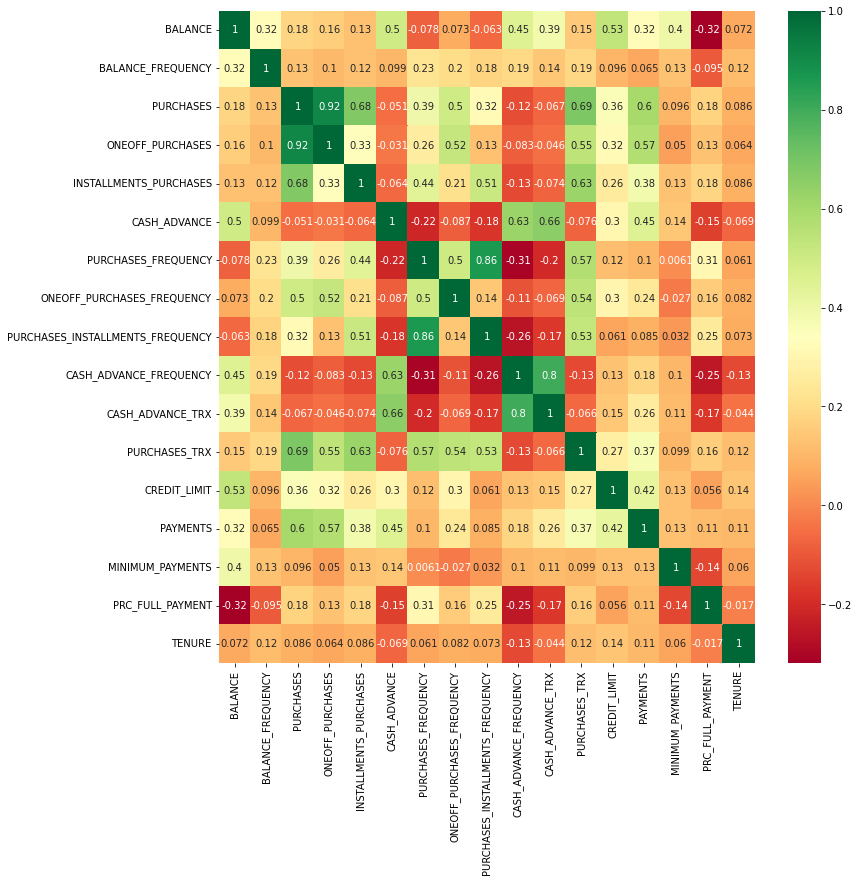

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap = 'RdYlGn')
plt.show()

In [ ]:
df.corr() 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322335,0.181230,0.164326,0.126437,0.496679,-0.078054,0.073114,-0.063267,0.449246,0.385139,0.154297,0.531283,0.322769,0.397906,-0.319018,0.072421
BALANCE_FREQUENCY,0.322335,1.000000,0.133586,0.104257,0.124204,0.099312,0.229440,0.202295,0.175869,0.192022,0.141516,0.189527,0.095843,0.064842,0.131128,-0.095308,0.118566
PURCHASES,0.181230,0.133586,1.000000,0.916844,0.679889,-0.051495,0.392991,0.498413,0.315537,-0.120137,-0.067194,0.689552,0.356963,0.603252,0.095772,0.180356,0.086155
ONEOFF_PURCHASES,0.164326,0.104257,0.916844,1.000000,0.330610,-0.031341,0.264913,0.524881,0.127699,-0.082622,-0.046226,0.545514,0.319724,0.567283,0.050243,0.132745,0.064047
INSTALLMENTS_PURCHASES,0.126437,0.124204,0.679889,0.330610,1.000000,-0.064264,0.442398,0.214016,0.511334,-0.132312,-0.074017,0.628097,0.256499,0.384066,0.134003,0.182548,0.086016
CASH_ADVANCE,0.496679,0.099312,-0.051495,-0.031341,-0.064264,1.000000,-0.215579,-0.086786,-0.177118,0.628535,0.656493,-0.075877,0.303985,0.453226,0.140735,-0.152961,-0.068552
PURCHASES_FREQUENCY,-0.078054,0.229440,0.392991,0.264913,0.442398,-0.215579,1.000000,0.501305,0.862921,-0.308483,-0.203541,0.568408,0.119788,0.103393,0.006106,0.305761,0.061006
ONEOFF_PURCHASES_FREQUENCY,0.073114,0.202295,0.498413,0.524881,0.214016,-0.086786,0.501305,1.000000,0.142270,-0.111707,-0.069116,0.544849,0.295038,0.243503,-0.027339,0.157497,0.082234
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063267,0.175869,0.315537,0.127699,0.511334,-0.177118,0.862921,0.142270,1.000000,-0.262955,-0.169250,0.529949,0.060755,0.085496,0.032021,0.250049,0.072926
CASH_ADVANCE_FREQUENCY,0.449246,0.192022,-0.120137,-0.082622,-0.132312,0.628535,-0.308483,-0.111707,-0.262955,1.000000,0.799573,-0.131161,0.132616,0.183206,0.100624,-0.249768,-0.133427


# How To Remove highly correlated Features 
1. **Using Plain Code.** 

  So i have used My Library For This Part but if you don't want to use it i'll explan you what is happening this can be done by follwing code below. 
```python
# Thanks to people at stackoverflow for this simple code or i have to delete these columns manually.
# Create correlation matrix
corr_matrix = df.corr().abs()
# Select upper triangle of correlation matrix for guidance check the above graph
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find features with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
# Drop features 
df.drop(to_drop, axis=1, inplace=True)
```

2. **Using Datawrang Library** 
  
  If you want to use my library the **Code** is similar but it has one more **Advantage** that you can also give a feature that you want not to get removed by using below code.
  In the next update it will be multiple feature option for now its just one    feature.
```python
# Suppose you want Balance feature to not get dropped or Min Paymen to not get dropped.
# And Want to drop all feature that are above or equals 90 percent corr-related.
import datawrang as dw
dw.Find_corr_drop_all(dataframe = df, feature = 'BALANCE', thresh = 0.9) 
```
more functionality are there like check **correlation** for each element, check only positive or negative etc more you can read in the documentation or collaborate with me on github.  

3. **How To Save If Don't Want some features removed ?** Just copy them in this way as shown below
  ```python
  temp = df[['<Feature Name>'],['<Feature Name>']...]
  # After Storing in temp apply datawrang
  dw.Find_corr_drop_all(dataframe = df, thresh = 0.9)
  df.merge(temp, left_index = True, right_index = True)
  # or you can use join also that's upto your choice but join gives error as it is old but merge is the newer solution
  ```

<img width = '200px' src= 'https://user-images.githubusercontent.com/74553737/177100736-64354d6d-00f3-4c54-9235-08f2d4c7a06b.png' />

***Data Wrang: Credits***

***

Documentation: **<a href = 'https://tusharnautiyal-web.github.io/DataWrang-Library/'>Go To Official Documentation</a>**

Github Link: **<a href = 'https://tusharnautiyal-web.github.io/DataWrang-Library/'>Go to Github Repo</a>**

Python Official PyPi Link: **<a href = 'https://pypi.org/project/DataWrang/'>Go To PyPi**</a>

Author: *Tushar Nautiyal*

Version Used: *datawrang 0.0.4.2* 


In [ ]:
pip install datawrang --quiet

In [ ]:
import datawrang as dw 
# Not giving it any feature for now.
dw.Find_corr_drop_all(dataframe = df, thresh = 0.8, feature = '')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,291.12,0.000000,1.000000,0.000000,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,300.00,0.000000,1.000000,0.000000,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,23.398673,0.833333,144.40,144.40,0.000000,0.833333,0.000000,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,36.558778,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
df.shape

(8949, 15)

In [ ]:
df.head() # So its done right ? giving this much amount of features to our model is not a good thing so we will do one more step.

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.4,0.000000,0.166667,0.000000,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.083333,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Why We Are Doing PCA ?** ⏬

Principal component analysis (PCA) simplifies the complexity in high-dimensional data while retaining trends and patterns. 

It does this by transforming the data into fewer dimensions, which act as summaries of features.

The curse of dimensionality is the issue it solves one of them is that in high-dimensional domain finding relevant neighbours becomes hard pca will solve that.

After doing pca if we do are clustering in scaled data then we will be able to visualize them properly in a 2d-plane in this scenario as we will only have two features after pca which will be a summary of all.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scalar = StandardScaler()
scaled_down = scalar.fit_transform(df)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_down)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df.head()

,PCA1,PCA2
0,-1.731443,-0.824420
1,-0.302237,2.533396
2,1.193903,-0.887381
3,-0.930396,-0.030404
4,-1.499829,-0.518001


## Elbow Method for Kmeans

This is used to find the optimum amount of clusters that we should be having. Below Code is how you can see the use of it wcss here stands for within clusters sum of squares.

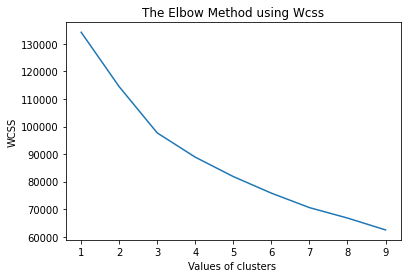

So We can see the best Value for our Cluster


In [ ]:
from sklearn.cluster import KMeans
wcss = []
# Now we will get different values for our clusters like i did 1, 20 
for i in range(1,10):
  kmeans = KMeans(n_clusters= i)
  kmeans.fit_predict(scaled_down) # giving it our scaled down Data.
  wcss.append(kmeans.inertia_) # this wcss value.

# Lets Plot the Graph now for elbow method
plt.plot(range(1,10),wcss)
plt.xlabel('Values of clusters ') 
plt.ylabel('WCSS') 
plt.title('The Elbow Method using Wcss') 
plt.show()
print('So We can see the best Value for our Cluster')

After this we can say that best n_clusters will be 3 and lets use it we can see that after using elbow method its very simple now to implement a kmeans clustering algorithm. 😀

In [ ]:
kmeans_model=KMeans(n_clusters = 3,  init = 'k-means++') 
# K-means++ is a standard method and which generally works better than Forgy’s method and the Random Partition method for initializing k-Means. 
kmeans_model.fit_predict(scaled_down)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

**Now We Can See How are cluster Are Distributed.** ⏬

In [ ]:
pca_df_kmeans

,PCA1,PCA2,cluster
0,-1.731443,-0.824420,2
1,-0.302237,2.533396,0
2,1.193903,-0.887381,1
3,-0.930396,-0.030404,2
4,-1.499829,-0.518001,2
...,...,...,...
8944,-1.040920,-1.541243,2
8945,-1.212199,-1.145434,2
8946,-1.506191,-1.312538,2
8947,-2.346069,-0.270548,2


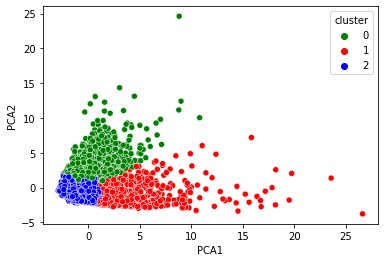

In [ ]:
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'cluster' ,data = pca_df_kmeans, palette = ['green','red','blue'])

In [ ]:
df2 = pd.merge(df,pca_df_kmeans, left_index = True, right_index = True)
df2.drop(['PCA1','PCA2'], axis = 1, inplace = True)

In [ ]:
df2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,95.4,0.000000,0.166667,0.000000,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.083333,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,2
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


# EDA after Clusters 
*Data Description:*
***
> CUSTID : Identification of Credit Card holder (Categorical)

> BALANCE : Balance amount left in their account to make purchases (

> BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

> PURCHASES : Amount of purchases made from account

> ONEOFFPURCHASES : Maximum purchase amount done in one-go

> INSTALLMENTSPURCHASES : Amount of purchase done in installment

> CASHADVANCE : Cash in advance given by the user

> PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

> ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

> PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

> CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

> CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

> PURCHASESTRX : Numbe of purchase transactions made

> CREDITLIMIT : Limit of Credit Card for user

> PAYMENTS : Amount of Payment done by user

> MINIMUM_PAYMENTS : Minimum amount of payments made by user

> PRCFULLPAYMENT : Percent of full payment paid by user

> TENURE : Tenure of credit card service for user




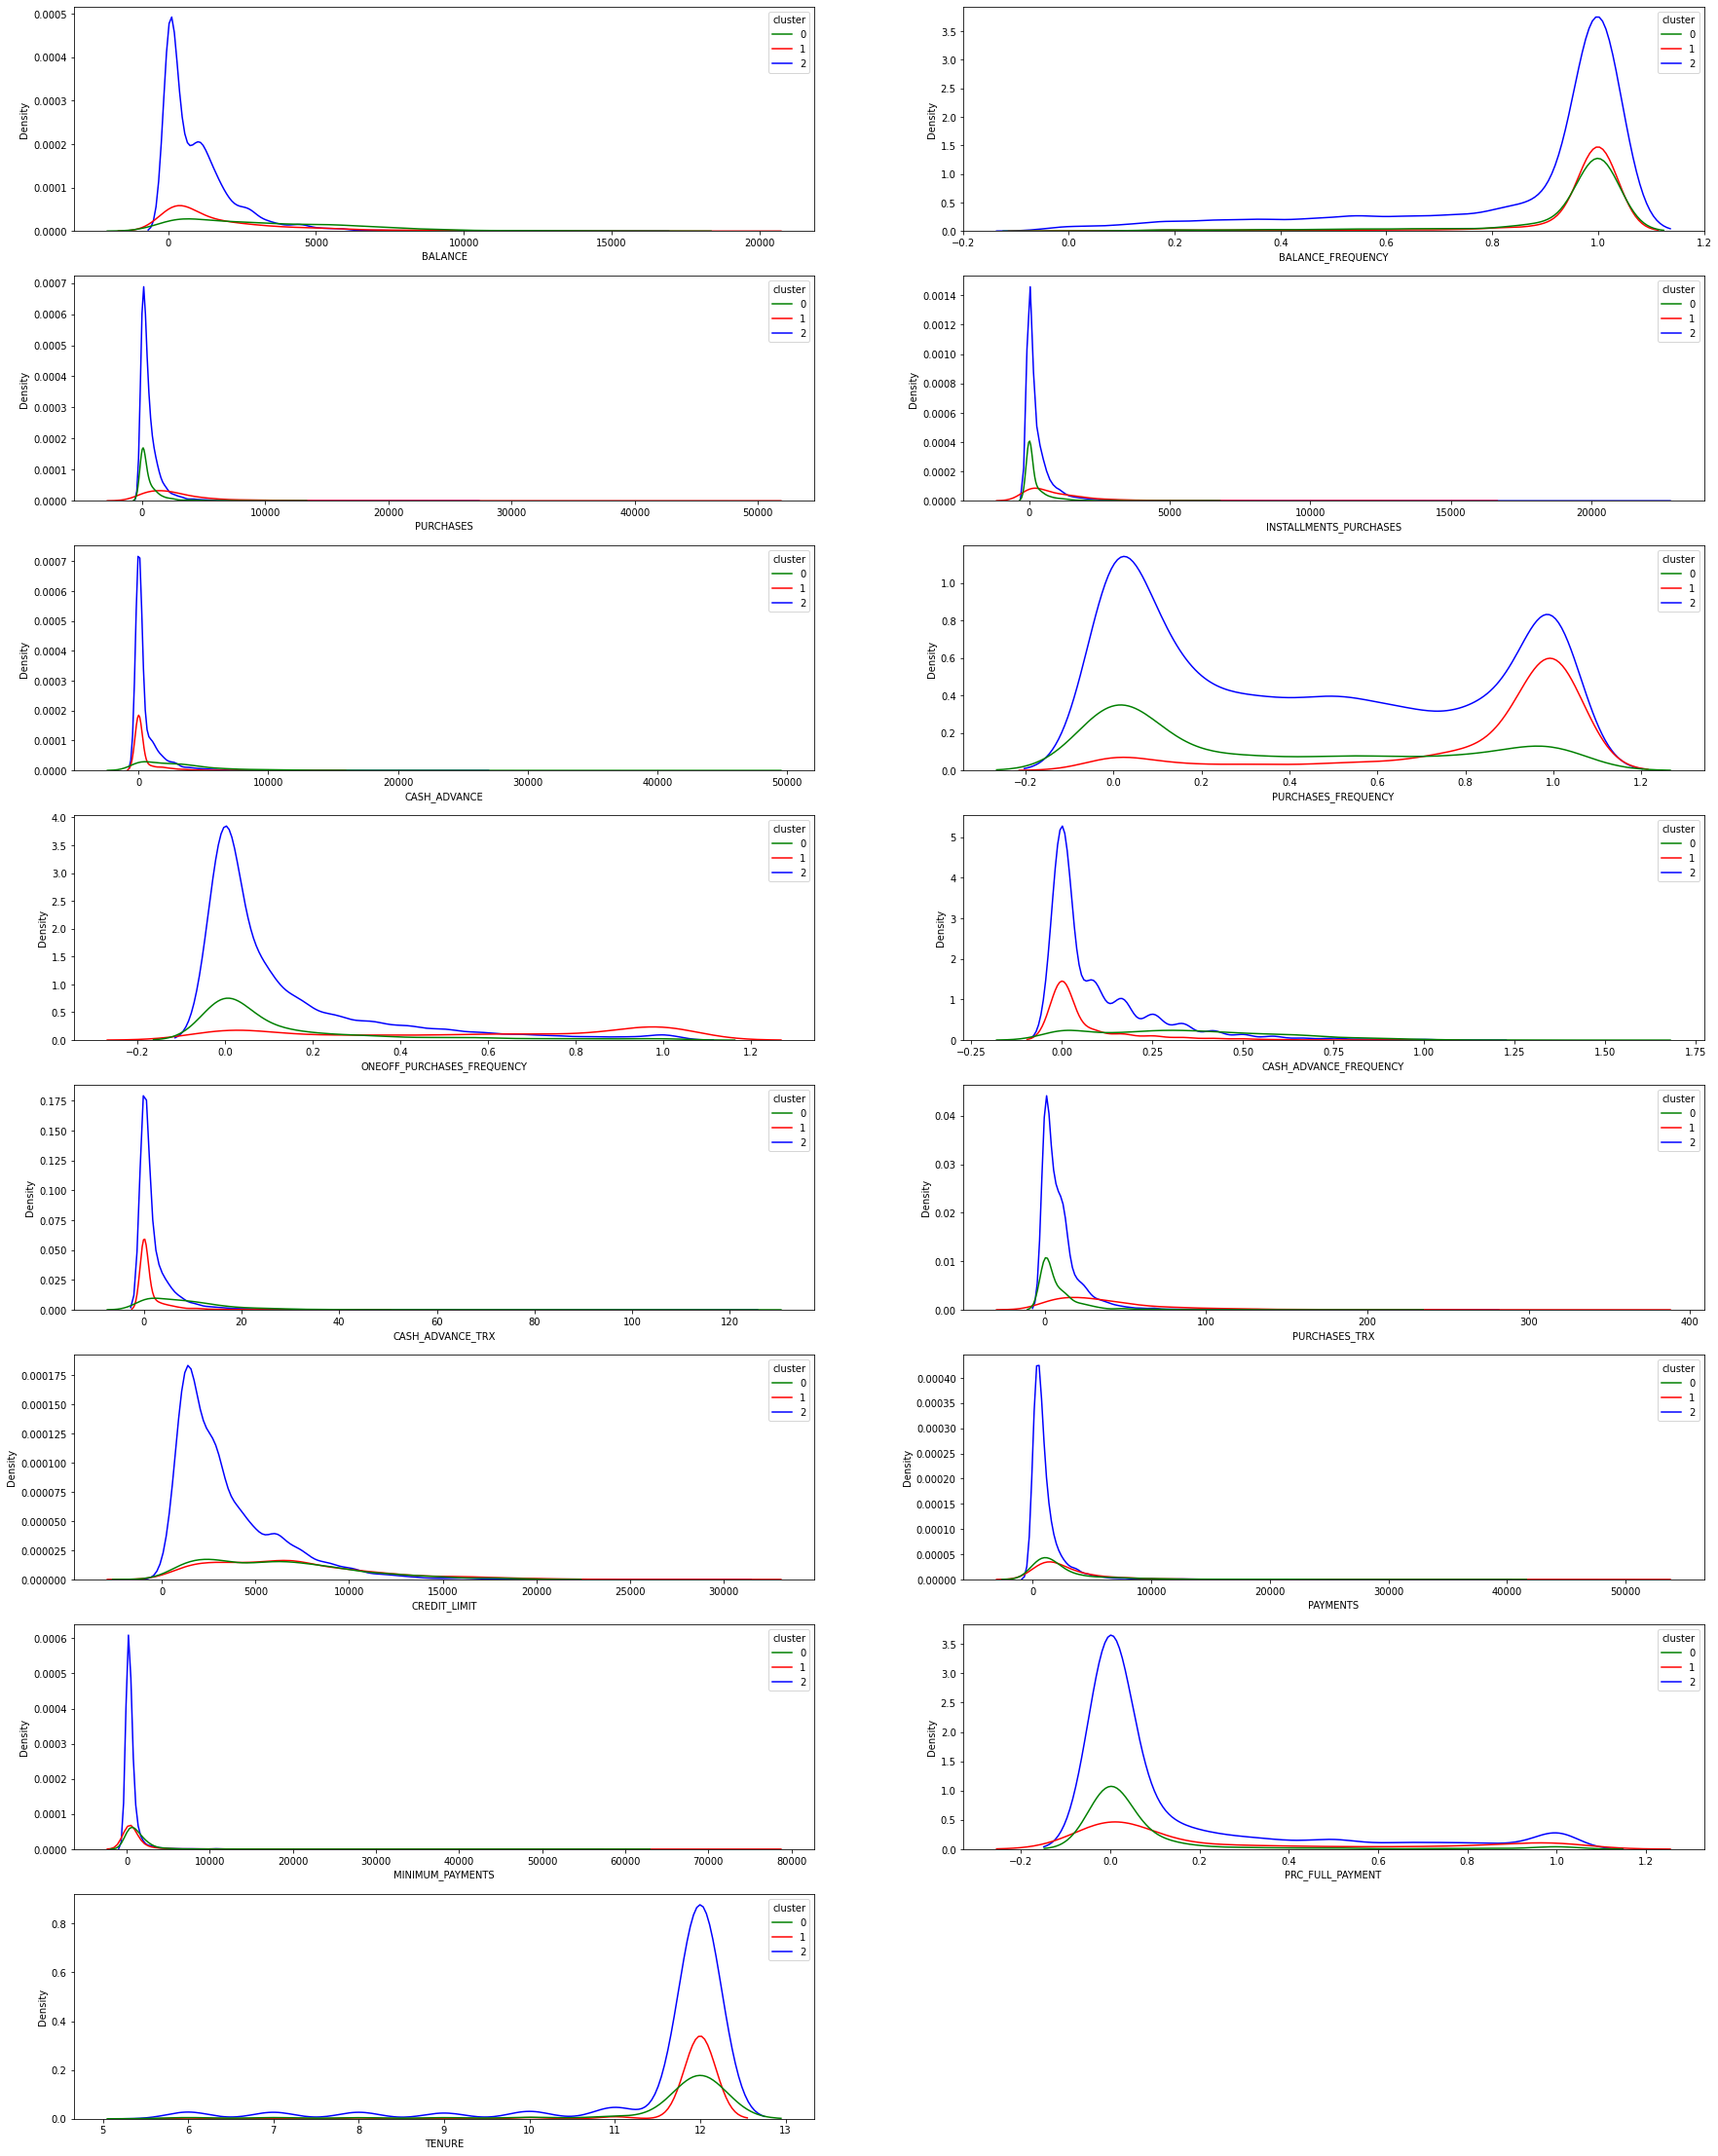

In [ ]:
# Lets Analyse with clusters 
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df2[col],hue = 'cluster', ax=ax, data = df2, palette = ['green','red','blue'])
    plt.xlabel(col)
        
plt.show()

**Observations**:

1. Blue has the highest density in our records which is cluster 2 for all the features whereas red and green are distributed differently in different features signifying that there are more people in cluster 2 less in cluster 0 and cluster 1 and 2

2. In Density vs Tenure you can see Cluster 0  are for more tenure then Cluster 1. Similarly people who are doing full payments are more in cluster 2(blue) and 0(green) then 1 (red) 

3. What more we could have been done ?

  We could create category for features like balance which are continous (not for all but for some) and should drop continous feature which would have helped us better analysing clusters.

In [ ]:
# Lets Do Some More Analysis
analysis_based_on_balance = df2[['BALANCE','cluster']]


In [ ]:
analysis_based_on_balance.head()

,BALANCE,cluster
0,40.900749,2
1,3202.467416,0
2,2495.148862,1
3,1666.670542,2
4,817.714335,2


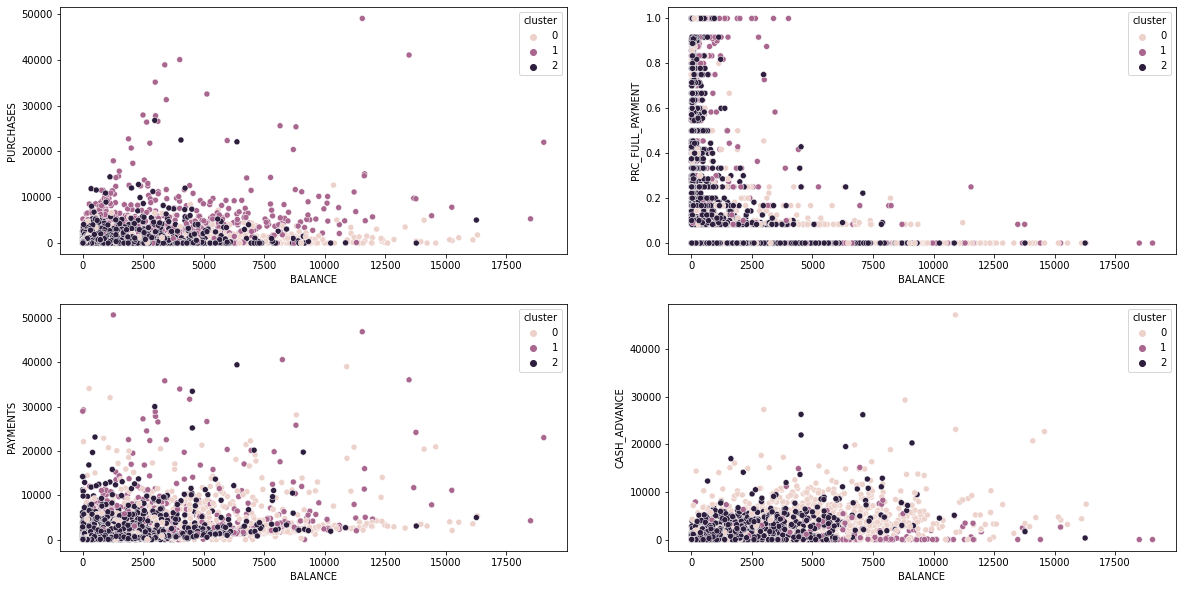

In [ ]:
fig,ax = plt.subplots(2,2 ,figsize = (20,10))
sns.scatterplot(x = 'BALANCE', y = 'PURCHASES', ax = ax[0][0], hue = 'cluster', data  = df2)
sns.scatterplot(x = 'BALANCE', y = 'PAYMENTS', ax = ax[1][0], hue = 'cluster', data  = df2)
sns.scatterplot(x = 'BALANCE', y = 'CASH_ADVANCE', ax = ax[1][1], hue = 'cluster', data  = df2)
sns.scatterplot(x = 'BALANCE', y = 'PRC_FULL_PAYMENT', ax = ax[0][1], hue = 'cluster', data  = df2)

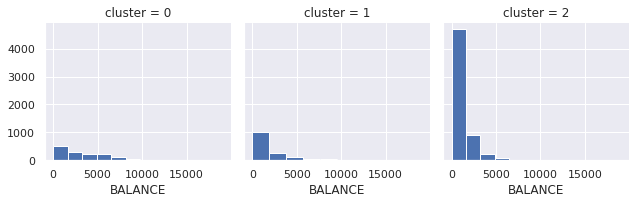

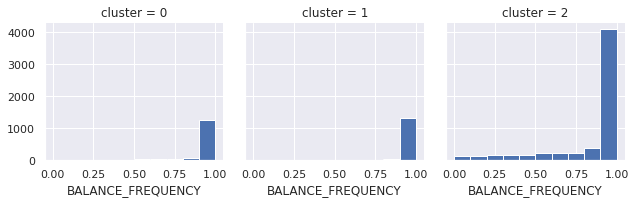

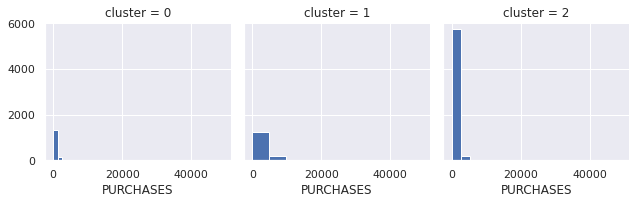

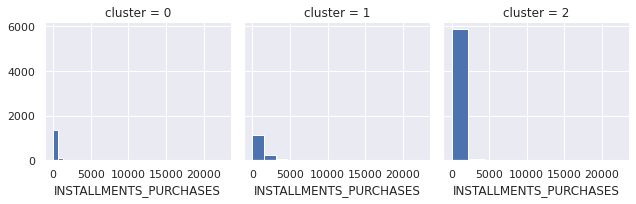

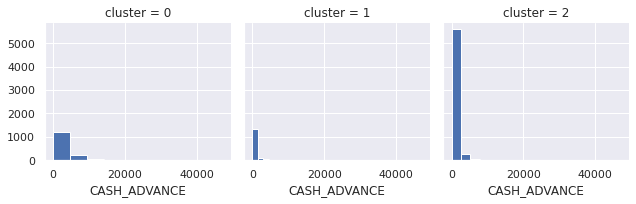

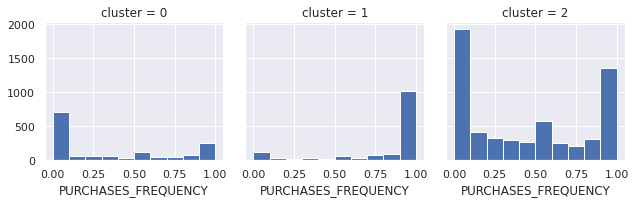

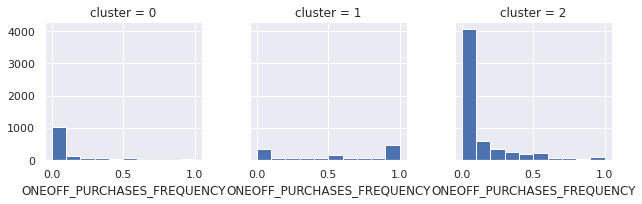

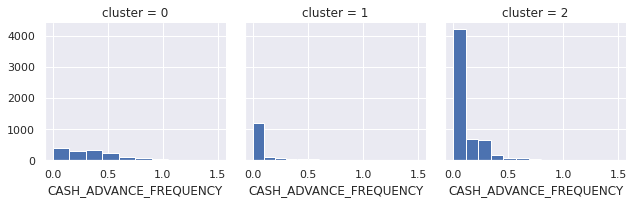

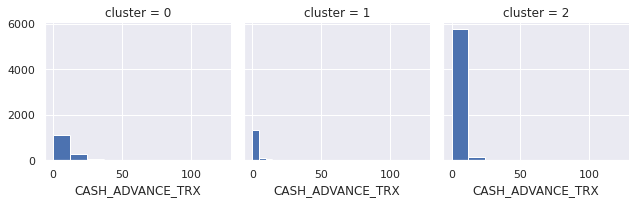

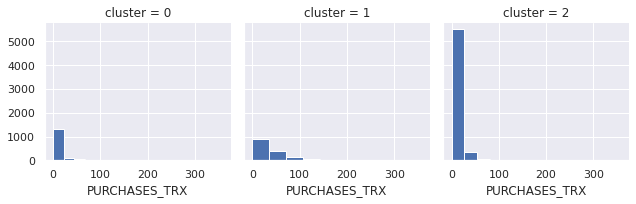

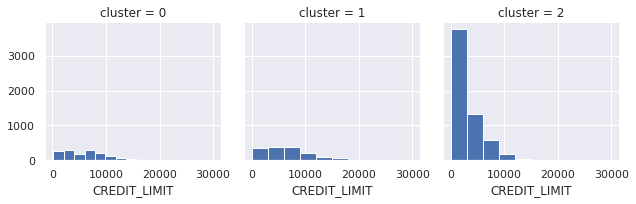

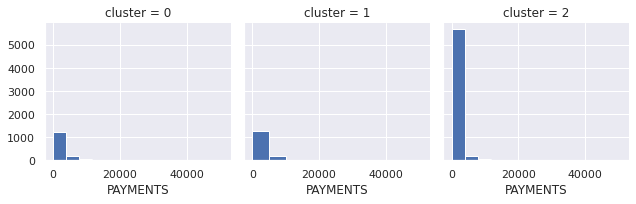

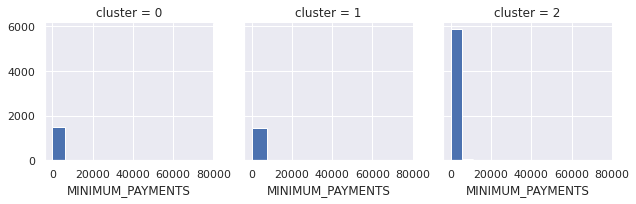

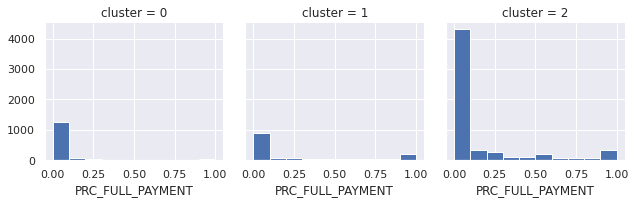

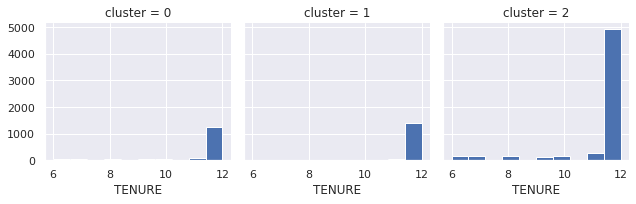

In [ ]:
# Final Analysis.
cluster_1_df = df2[df2["cluster"]==0]
cluster_2_df = df2[df2["cluster"]==1]
cluster_3_df = df2[df2["cluster"]==2]

sns.set(rc={'figure.figsize':(13,8)})

for c in df2.drop(['cluster'],axis=1):
    grid= sns.FacetGrid(df2, col='cluster', )
    grid= grid.map(plt.hist, c)

plt.show()

**Final Observations**:
1. Purchase vs Balance Showed cluster 1 are having higher balance and thus have higher purcahsing power. 
2. Cluster 1 and 0 is doing most high amount of payments whereas there are some people in cluster 2 which are have less balance but do higher amount of payments. 
3. Purchase Frequency of Cluster 2 is on higher side 

4. We can do more analysis for different different features later on lets now deploy our project


# Creating a Classifier 
We will be trying out different classifier for this we can try different different solutions and can check accuracy.
1. Random Forest Classfier
2. Decision Trees
3. AdaBoost 
4. KNN


In [ ]:
new_data =  df2.drop('cluster', axis = 1)
X = new_data
y = df2['cluster']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [ ]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.61      0.65       419
           1       0.76      0.62      0.69       460
           2       0.84      0.91      0.87      1806

    accuracy                           0.81      2685
   macro avg       0.77      0.71      0.74      2685
weighted avg       0.81      0.81      0.81      2685



In [ ]:
#Decision_Tree
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.50      0.46       419
           1       0.55      0.55      0.55       460
           2       0.81      0.77      0.79      1806

    accuracy                           0.69      2685
   macro avg       0.59      0.61      0.60      2685
weighted avg       0.70      0.69      0.70      2685



In [ ]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.49      0.56       419
           1       0.74      0.51      0.60       460
           2       0.81      0.92      0.86      1806

    accuracy                           0.78      2685
   macro avg       0.73      0.64      0.67      2685
weighted avg       0.77      0.78      0.77      2685



In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.50      0.52       419
           1       0.63      0.52      0.57       460
           2       0.80      0.86      0.83      1806

    accuracy                           0.74      2685
   macro avg       0.66      0.63      0.64      2685
weighted avg       0.74      0.74      0.74      2685



In [ ]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
random_rf = RandomForestClassifier()
random_rf.fit(X_train, y_train)

RandomForestClassifier()

# Conclusion
The best results is given by Random Forest , we could see more different things if we had more domain knowledge of this data. But for now we will take random forest classfier iam not doing hyper parameter tuning but anyone can try if they want. 

In [ ]:
import pickle
file = open('random_f.pkl', 'wb')
pickle.dump(random_rf,file)

# Streamlit deployment 
1. Installing all the libs 
2. Writing files 
3. Local tunnel start 


In [ ]:
!pip install streamlit --quiet
!pip install ipykernel --quiet
!pip install tornado
!npm install -g localtunnel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 0.853s


   ╭────────────────────────────────────────────────────────────────╮
   │                                                                │
   │      New major version of npm available! 6.14.8 → 8.13.2       │
   │   Changelog: https://github.com/npm/cli/releases/tag/v8.13.2   │
   │               Run npm install -g npm to update!                │
   │                                                                │
   ╰────────────────────────────────────────────────────────────────╯



In [ ]:
%%writefile app.py
import streamlit as st
import pickle
import sklearn
model = 'random_f.pkl'
loaded_model = pickle.load(open(model, 'rb'))
st.markdown('<style>body{background-color: Blue;}</style>',unsafe_allow_html=True)
st.title("Prediction")
# BALANCE	BALANCE_FREQUENCY	PURCHASES	INSTALLMENTS_PURCHASES	CASH_ADVANCE	PURCHASES_FREQUENCY	ONEOFF_PURCHASES_FREQUENCY	CASH_ADVANCE_FREQUENCY	CASH_ADVANCE_TRX	PURCHASES_TRX	CREDIT_LIMIT	PAYMENTS	MINIMUM_PAYMENTS	PRC_FULL_PAYMENT	TENURE
with st.form("my_form"):
    balance = st.number_input(label='Balance',step=0.001,format="%.6f") #
    balance_frequency = st.number_input(label='Balance Frequency',step=0.001,format="%.6f")#
    purchases = st.number_input(label='Purchases',step=0.01,format="%.2f") #
    installments_purchases=st.number_input(label='Installments Purchases',step=0.01,format="%.2f") #
    cash_advance=st.number_input(label='Cash Advance',step=0.01,format="%.6f")
    purchases_frequency=st.number_input(label='Purchases Frequency',step=0.01,format="%.6f")
    oneoff_purchases_frequency=st.number_input(label='OneOff Purchases Frequency',step=0.1,format="%.6f")
    cash_advance_frequency=st.number_input(label='Cash Advance Frequency',step=0.1,format="%.6f")
    cash_advance_trx=st.number_input(label='Cash Advance Trx',step=1)
    purchases_trx=st.number_input(label='Purchases TRX',step=1)
    credit_limit=st.number_input(label='Credit Limit',step=0.1,format="%.1f")
    payments=st.number_input(label='Payments',step=0.01,format="%.6f")
    minimum_payments=st.number_input(label='Minimum Payments',step=0.01,format="%.6f")
    prc_full_payment=st.number_input(label='PRC Full Payment',step=0.01,format="%.6f")
    tenure=st.number_input(label='Tenure',step=1)

    data=[[balance,balance_frequency,purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure]]

    submitted = st.form_submit_button("Submit")

if submitted:
    clust=loaded_model.predict(data)[0]
    st.success(f'The Person is in cluster {clust}')


Writing app.py


# **This is Final Step**: ✅
After running the below code you will see something like this. Click on the your url - url to check the app. 

**Ignore** the warning that you see its to avoid bad people from phishing as they can use local tunnel also Press Click to Continue. 
```
2022-05-22 14:32:29.423 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 2.788s
your url is: https://social-aliens-lick-35-245-190-225.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.245.190.225:8501```
```
If you like such notebooks and projects do check out my social profile and follow me there 
Peace out✌


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

2022-07-04 16:06:32.530 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.125.133.11:8501

npx: installed 22 in 3.15s
your url is: https://fancy-parents-deny-34-125-133-11.loca.lt
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
